In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import explained_variance_score as EVS
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [2]:
#assigning data to variables
h_train = pd.read_csv("california_housing_train.csv")
h_test = pd.read_csv("california_housing_test.csv")

#print(f'clean data shape after dropping na values {h_train.dropna().shape} and initial data shape {h_train.shape} \nwihch means it doesnt need to be cleaned')

#turning data into numpy array for NN, separeting input and target values
x_train, y_train = h_train.to_numpy()[:,:-1], h_train.to_numpy()[:,-1]
x_test, y_test =   h_test.to_numpy()[:,:-1] , h_test.to_numpy()[:,-1]

#8/9 columns for input value "x_train" and median_house_value "y_train" as target value
x_train.shape, y_train.shape

y_train

array([ 66900.,  80100.,  85700., ..., 103600.,  85800.,  94600.])

In [3]:
#scaling values
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train.astype(np.float))
x_test = s_scaler.transform(x_test.astype(np.float))

In [4]:
#Part1 training with tensorflow

In [5]:
model = Sequential() #creating model

model.add(Dense(180,activation='linear')) # 1 hidden layer as given
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,epochs=400)

model.summary()
#model.save('saved_model/my_model') to save

Epoch 1/400
133/133 [==============================] - 0s 2ms/step - loss: 56423534592.0000 - val_loss: 55160328192.0000
Epoch 2/400
133/133 [==============================] - 0s 1ms/step - loss: 56414507008.0000 - val_loss: 55146782720.0000
Epoch 3/400
133/133 [==============================] - 0s 1ms/step - loss: 56394715136.0000 - val_loss: 55122870272.0000
Epoch 4/400
133/133 [==============================] - 0s 1ms/step - loss: 56364347392.0000 - val_loss: 55089209344.0000
Epoch 5/400
133/133 [==============================] - 0s 1ms/step - loss: 56324059136.0000 - val_loss: 55046410240.0000
Epoch 6/400
133/133 [==============================] - 0s 1ms/step - loss: 56274497536.0000 - val_loss: 54995161088.0000
Epoch 7/400
133/133 [==============================] - 0s 992us/step - loss: 56216141824.0000 - val_loss: 54935658496.0000
Epoch 8/400
133/133 [==============================] - 0s 1ms/step - loss: 56149467136.0000 - val_loss: 54868398080.0000
Epoch 9/400
133/133 [=========

<AxesSubplot:>

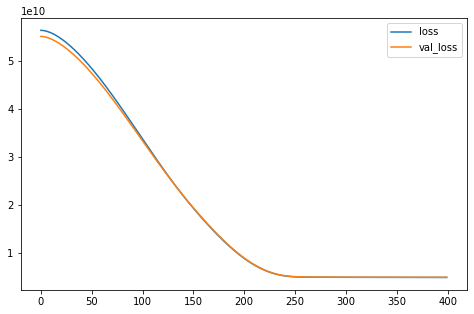

In [6]:
#plotting loss graph
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(8,5))

accuracy is 61.91%


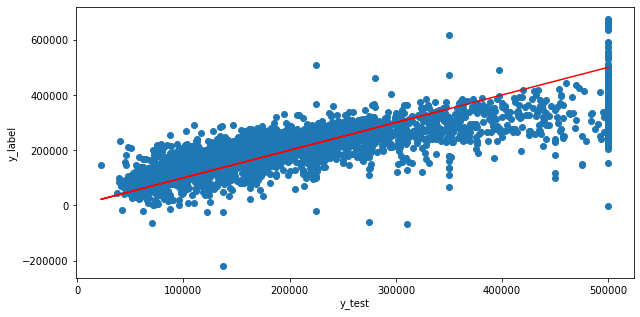

In [7]:
#calculating accuracy
y_pred = model.predict(x_test)
print(f'accuracy is {EVS(y_test,y_pred)*100:.2f}%')

#plotting the prediction prices vs real prices with true indicater
fig = plt.figure(figsize=(10,5))
plt.xlabel("y_test")
plt.ylabel("y_label")
plt.scatter(y_test,y_pred)
#True price line
plt.plot(y_test,y_test,'r')

In [8]:
#Part2 training with sklearn

In [8]:
from sklearn.linear_model import LinearRegression

#setting regression type and fitting model 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

#prediction values that model produced
y_predd = regressor.predict(x_test) 

#printing details
print('Linear Regression Model:')
print(f"Train Score {regressor.score(x_train,y_train)*100:.2f}%")
print(f"Test Score {regressor.score(x_test, y_test)*100:.2f}%")

Linear Regression Model:
Train Score 64.13%
Test Score 61.95%


C:\Users\Giray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

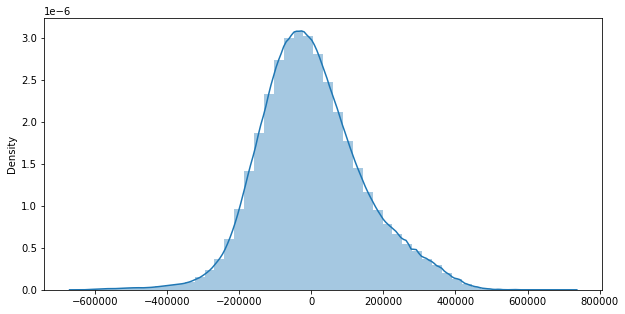

In [9]:
import seaborn as sns

#plotting the error amount distribution
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)